In [70]:
import requests #import the proper libraries in this apart 
import json 
import pandas as pd

In [69]:
#establish api-url and token, banxico:https://www.banxico.org.mx/SieAPIRest/service/v1/doc/catalogoSeries#
url='https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF63528/datos'
token='eb0cc5fea0f57a12594e4c6d5adf438146f7ffdc63995dcfde3406990d42e913'

In [68]:
#Create a variable for the response from api
response=requests.get(url, headers={"BMX-Token":token})


In [67]:
#verification response and create a file json as response 
if response.status_code==200:
    data=response.json()
    print(f'the information about response')
    json.dumps(data, indent=4)
else:
    print ('error')

the information about response


In [66]:
series = data['bmx']['series'][0]['datos'] #acces to index for necessary data
series[2:10]

[{'fecha': '21/04/1954', 'dato': '0.01250'},
 {'fecha': '22/04/1954', 'dato': '0.01250'},
 {'fecha': '23/04/1954', 'dato': '0.01250'},
 {'fecha': '26/04/1954', 'dato': '0.01250'},
 {'fecha': '27/04/1954', 'dato': '0.01250'},
 {'fecha': '28/04/1954', 'dato': '0.01250'},
 {'fecha': '29/04/1954', 'dato': '0.01250'},
 {'fecha': '30/04/1954', 'dato': '0.01250'}]

In [64]:
dates=[ d['fecha']  for d  in series] #create a list with dates 
print (len (dates))


17864


In [65]:
values= [float(v['dato']) for v in series ] #create a list with value of dolar 
len (values)


17864

In [15]:
import numpy as np  #numpy for arrays and matrix 
import matplotlib.pyplot as plt #for graphic 
import seaborn as sns


In [71]:
df =pd.DataFrame({'Dates':dates, 'value of dolar':values}) # create a Data frame through a diccionary 
df.head(10)


,Dates,value of dolar
0,19/04/1954,0.0125
1,20/04/1954,0.0125
2,21/04/1954,0.0125
3,22/04/1954,0.0125
4,23/04/1954,0.0125
5,26/04/1954,0.0125
6,27/04/1954,0.0125
7,28/04/1954,0.0125
8,29/04/1954,0.0125
9,30/04/1954,0.0125


In [17]:
df.isnull().sum()  #know empty values 

Dates             0
value of dolar    0
dtype: int64

In [18]:
df=df.dropna() #delete a empty rows 

In [19]:
df.shape # know the shape of data frame, rows and colums 

(17864, 2)

In [20]:
df['Dates'] = pd.to_datetime(df['Dates']) #transform the colum 'Dates' in datetime


C:\Users\eduar\AppData\Local\Temp\ipykernel_21268\3606239582.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Dates'] = pd.to_datetime(df['Dates']) #transform the colum 'Dates' in datetime


In [21]:
df.describe() #know more data 

,Dates,value of dolar
count,17864,17864.000000
mean,1989-03-07 13:38:20.582176512,5.891909
min,1954-04-19 00:00:00,0.012500
25%,1971-05-31 18:00:00,0.012500
50%,1989-01-19 12:00:00,2.324500
75%,2006-11-06 06:00:00,11.032225
max,2024-08-12 00:00:00,25.118500
std,NaN,6.950516


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17864 entries, 0 to 17863
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Dates           17864 non-null  datetime64[ns]
 1   value of dolar  17864 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 279.3 KB


In [23]:
df.dtypes # 

Dates             datetime64[ns]
value of dolar           float64
dtype: object

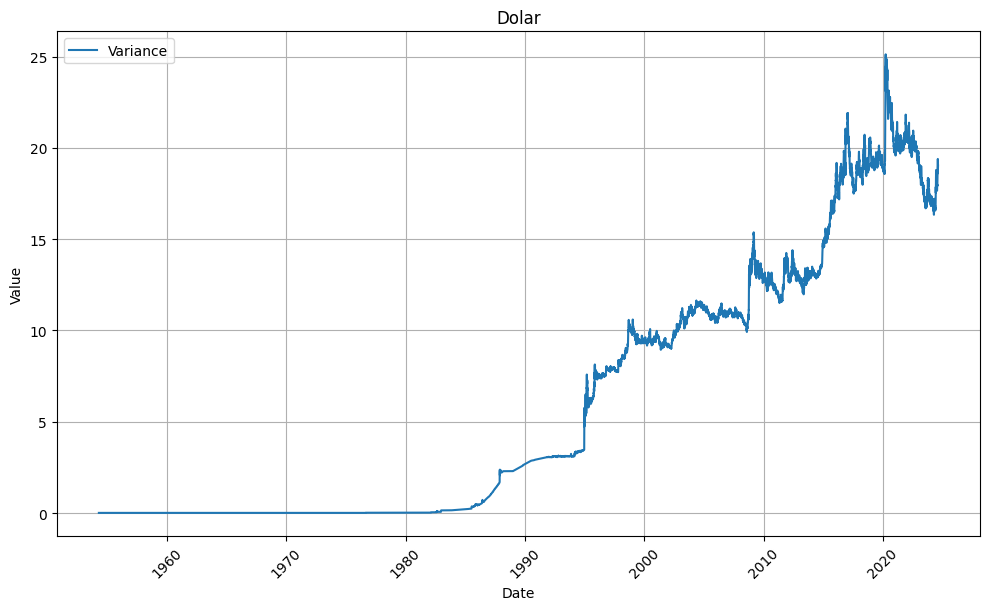

In [24]:
plt.figure(figsize=(10, 6))#create a graphic for understarding the value of dolar 
plt.plot(df['Dates'],df['value of dolar'], label='Variance')
plt.title('Dolar')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [25]:
df_array=df.iloc[1:17862, 1:2] #selection about for index for generate an array, specifically the first colum, taken all data

In [26]:
print (df_array) #show the data taken
print (df_array.shape)

       value of dolar
1              0.0125
2              0.0125
3              0.0125
4              0.0125
5              0.0125
...               ...
17857         19.0442
17858         19.3905
17859         19.3300
17860         19.1890
17861         19.0900

[17861 rows x 1 columns]
(17861, 1)


In [27]:
df_array=np.array(df_array) #transform the colum in array 

In [28]:
df_array #array 

array([[1.2500e-02],
       [1.2500e-02],
       [1.2500e-02],
       ...,
       [1.9330e+01],
       [1.9189e+01],
       [1.9090e+01]])

In [29]:
df_array.shape # the shape of array 

(17861, 1)

In [30]:
df_array.reshape(-1,1) # transform in 1 colum 

array([[1.2500e-02],
       [1.2500e-02],
       [1.2500e-02],
       ...,
       [1.9330e+01],
       [1.9189e+01],
       [1.9090e+01]])

In [31]:
from sklearn.preprocessing import MinMaxScaler # scaler data in range 0-1
scaler=MinMaxScaler()

In [32]:
df_reshape=scaler.fit_transform(df_array) # aplication about the data

In [33]:
df_reshape#scalers values in range 0-1

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.76943758],
       [0.7638214 ],
       [0.75987812]])

In [34]:
17861*80/100 # data for train 

14288.8

In [35]:
17861*20/100# data for test

3572.2

In [36]:
train = df_reshape[:13996] #data in index 
test = df_reshape[13396:]

In [37]:
train #data for training 

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.57034972],
       [0.57249263],
       [0.56318012]])

In [38]:
train.shape # rows and colum

(13996, 1)

In [39]:
test #data for testing 

array([[0.43104835],
       [0.43047479],
       [0.43206007],
       ...,
       [0.76943758],
       [0.7638214 ],
       [0.75987812]])

In [40]:
test.shape # rows and colum

(4465, 1)

In [41]:
time=365# the time is the amount of data that is incorporated into a block, for each set of 365 data, it generates a single output
X_train = [] #for each set of 365 data, it generates a single output
Y_train = [] #that is 365 for one output
m = len(train)
for i in range(time,m):
    X_train.append(train[i-time:i,0])
    Y_train.append(train[i,0])


In [42]:
X_train, Y_train = np.array(X_train), np.array(Y_train) # create again a arra for each dataset

In [43]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (13631, 365)
Y_train shape: (13631,)


In [44]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #reshape for data 

In [45]:
from keras.models import Sequential # import the models 
from keras.layers import LSTM, Dense


In [46]:
dim_entrada = (X_train.shape[1],1) #data for model, creata a tuple for model as input for neural network
dim_salida = 1 # only one output in the neural network
na = 50 # define the dimension neural 
# define the dimension in output and input 

In [47]:
model=Sequential() # creatl el model, the object 

In [48]:
model.add(LSTM(units=na, input_shape=dim_entrada)) # add caps in model 

c:\Users\eduar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.add(Dense(units=dim_salida)) #define the output

In [50]:
model.compile(optimizer='rmsprop', loss='mse')#adjust the weight for neural network
#loss function, which is used to evaluate how good the model's prediction, its compared to the actual values.

In [51]:
model.fit(X_train,Y_train,epochs=20,batch_size=30) #iteration and data block

Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - loss: 0.0014
Epoch 2/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - loss: 7.3209e-05
Epoch 3/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - loss: 5.1793e-05
Epoch 4/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - loss: 3.8142e-05
Epoch 5/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 38s 83ms/step - loss: 3.6375e-05
Epoch 6/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - loss: 3.2656e-05
Epoch 7/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - loss: 3.1137e-05
Epoch 8/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - loss: 2.7333e-05
Epoch 9/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - loss: 2.3557e-05
Epoch 10/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 45s 98ms/step - loss: 2.2085e-05
Epoch 11/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - loss: 2.1314e-05
Epoch 12/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - loss: 2.1777e-05
Epoch 13/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - loss: 2.1311e-05
Epoch 14/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/s

In [52]:

x_test = scaler.transform(test)

In [53]:
X_test = []#model was trained to take 365 and generate a data as a prediction, in this case it reorganize the validation set (x_test) 
for i in range(time,len(x_test)):
    X_test.append(x_test[i-time:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [54]:
prediccion = model.predict(X_test)
predict = scaler.inverse_transform(prediccion) # take away the scaler

129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step


In [55]:
predict#prediction in shape of array

array([[0.47873527],
       [0.478562  ],
       [0.47820207],
       ...,
       [0.8142305 ],
       [0.8195672 ],
       [0.8223075 ]], dtype=float32)

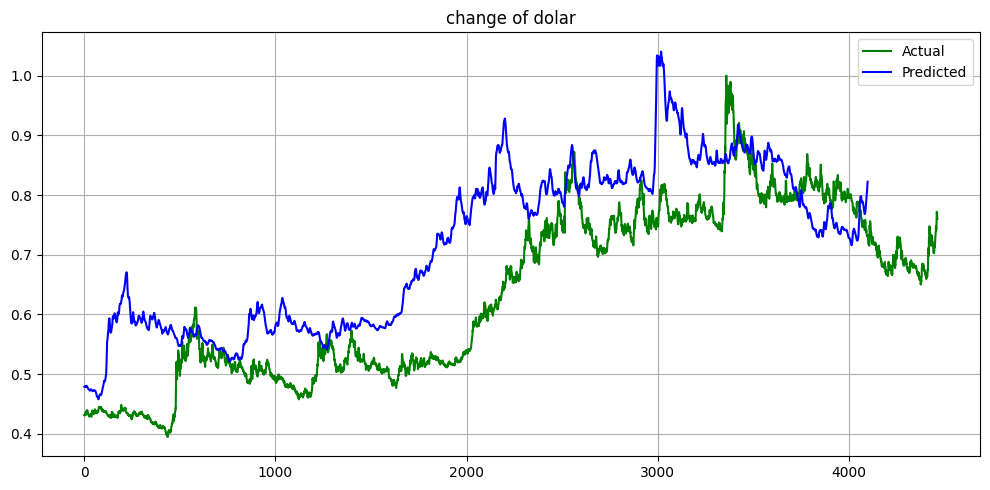

In [56]:
plt.figure(figsize=(10,5)) #graphic for the prediction and actual
plt.title('change of dolar')
plt.plot(test , label = 'Actual', color = 'g')
plt.plot(predict , label = 'Predicted', color = 'b')
plt.grid()
plt.tight_layout()
plt.legend()